<a href="https://colab.research.google.com/github/mmanchem/ArjunPython/blob/master/Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### A MNIST-like fashion product database

In this, we classify the images into respective classes given in the dataset. We use a Neural Net and a Deep Neural Net in Keras to solve this and check the accuracy scores.

### Load tensorflow

In [0]:
import tensorflow as tf
tf.set_random_seed(42)

In [113]:
tf.__version__

'1.12.0'

### Collect Data

In [0]:
import keras

In [0]:
(trainX, trainY), (testX, testY) = keras.datasets.fashion_mnist.load_data()

In [116]:
print(trainY[0])

9


### Convert both training and testing labels into one-hot vectors.

**Hint:** check **tf.keras.utils.to_categorical()**

In [0]:
import numpy as np
np.unique(trainY)
np.unique(testY)
trainY=tf.keras.utils.to_categorical(
    trainY,
    num_classes=10
)

testY=tf.keras.utils.to_categorical(
    testY,
    num_classes=10
)

In [118]:
print(trainX.shape)
#print('First 5 examples now are: ', trainX[0:1])

(60000, 28, 28)


### Visualize the data

Plot first 10 images in the triaining set and their labels.

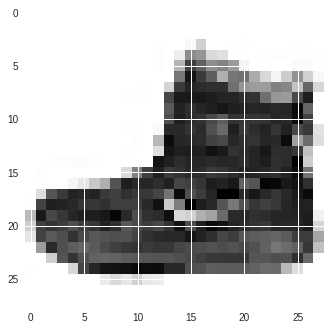

In [119]:
import matplotlib.pyplot as plt
#import matplotlib.image as mpimg
for i in range(0,1):
  plt.imshow(trainX[0])
  plt.show()



### Build a neural Network with a cross entropy loss function and sgd optimizer in Keras. The output layer with 10 neurons as we have 10 classes.

In [120]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Convolution2D(64, 3, 3, input_shape = (28,28,1), activation = 'relu'))
 #nb_filters=32,64,128,256...,n=3,3 no.of rows and columns of feature detector
  
  # Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Convolution2D(32, 3, 3, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(output_dim = 128, activation = 'relu'))  #LEAST VALUE IS 64  MAX 512
classifier.add(Dense(output_dim = 10, activation = 'softmax'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 11, 11, 32)        18464     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 128)               102528    
_________________________________________________________________
dense_18 (Dense)             (None, 10)                1290      
Total para

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), input_shape=(28, 28, 1..., activation="relu")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=10)`


### Execute the model using model.fit()

### In the above Neural Network model add Batch Normalization layer after the input layer and repeat the steps.

In [121]:
trainX = trainX.reshape(trainX.shape[0], 28, 28, 1)
testX = testX.reshape(testX.shape[0], 28, 28, 1 )

classifier.fit(trainX, trainY,
          batch_size=32,
          epochs=10,
          verbose=1,
          validation_data=(testX, testY))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 15s 256us/step - loss: 1.3879 - acc: 0.7691 - val_loss: 0.4175 - val_acc: 0.8489
Epoch 2/10
60000/60000 [==============================] - 15s 249us/step - loss: 0.3622 - acc: 0.8644 - val_loss: 0.4013 - val_acc: 0.8594
Epoch 3/10
60000/60000 [==============================] - 15s 251us/step - loss: 0.3203 - acc: 0.8806 - val_loss: 0.3531 - val_acc: 0.8703
Epoch 4/10
60000/60000 [==============================] - 15s 250us/step - loss: 0.2898 - acc: 0.8918 - val_loss: 0.3262 - val_acc: 0.8825
Epoch 5/10
60000/60000 [==============================] - 15s 250us/step - loss: 0.2667 - acc: 0.8997 - val_loss: 0.3550 - val_acc: 0.8759
Epoch 6/10
60000/60000 [==============================] - 15s 249us/step - loss: 0.2474 - acc: 0.9061 - val_loss: 0.3356 - val_acc: 0.8833
Epoch 7/10
60000/60000 [==============================] - 15s 249us/step - loss: 0.2347 - acc: 0.9103 - val_loss: 0.

### Customize the learning rate to 0.001 in sgd optimizer and run the model

In [122]:
score = classifier.evaluate(testX, testY, verbose=0)
# Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.887


In [123]:
x=classifier.predict(testX)
np.argmax(x[10])

4

### Build the Neural Network model with 3 Dense layers with 100,100,10 neurons respectively in each layer. Use cross entropy loss function and singmoid as activation in the hidden layers and softmax as activation function in the output layer. Use sgd optimizer with learning rate 0.03.

## Review model

### Run the model